# *`12_Principal Component Analysis`*

Principal component analysis (PCA) is a statistical technique that reduces the dimensionality of large data sets. It's a linear dimensionality reduction technique that's used in exploratory data analysis, visualization, and data preprocessing.

### Curse of Dimensionality

The curse of dimensionality states that, as we go on adding more features to our model, the model starts improving but after an optimal time it gets plateaued. That is model doesn't improves any further.

**`Performance decreases and computation increases`**

Possible solution:
To reduce the dimensionality of the data, we can do following things:
1. Feature Selection
2. Feature Extraction

**Feature Extraction**

Following are the few feature extraction techniques:
 1. Principal Component Analysis (PCA)
 2. Linear Discriminant Analysis (LDA)
 3. t-distributed Stochastic Neighbor Embedding (t-SNE)

\
> **PCA Further**

We realize that PCA is a Feature extraction technique.
* PCA is an *Unsupervised Machine Learning* Algorithm.
* It allows faster execution of algorithms.
* It helps in the visualization of higher dimensional data.
* It helps in overcoming the *Curse of Dimensionality.*

> **Geometric Intuition**

Suppose we have a data for housing prices as mentioned in the table whose scatter is shown below:

|  | No. of rooms | No. of Grocery | Price in lakhs |
| --- | --- | --- | --- |
| 1. | 3 | 2 | 60 |
| 2. | 4 | 0 | 130 |
| 3. | 5 | 6 | 170 |
| 4. | 2 | 10 | 90 |

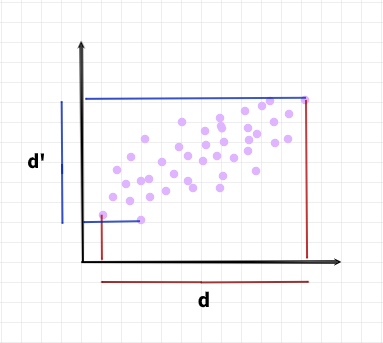

Since we are able to capture more variance on the $x$ axis therefore, we will consider rooms variable. We select $d$ as our feature. But if, $d'$ becomes equal to $d$, that means both the variables are able to explain the variance equally. In that case feature extraction helps. what it does is rotate the axis to capture the max variance.

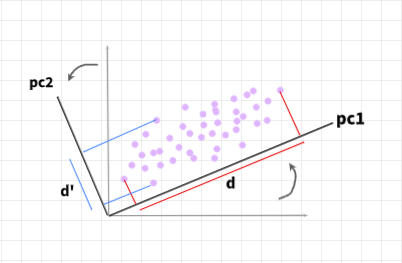

The rotated axes are called **Principal Components**, we then transform the data accordingly. The number of principal components are always less than the number of original features in the data.

$\text {no. of PC's} \lt \text {no. of features}$

\
#### Why **Variance** is important?
Variance by definition means that spread of the data. The more of a formal definition would be: Variance refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean (average), and thus from every other number in the set.

Mean Absolute Deviation also represents spread of the data but PCA does not make use of it because it uses modulus and it fails to differentiate at 0.

Variance is proportional to spread that means if spread is more variance will be more.


#### **PCA Problem formulation**

PCA represents the data in lower dimension in such a way that the essence of data is reserved.

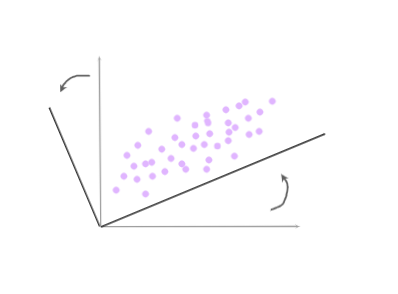

Let's take one data point and try to project that on the new axis.

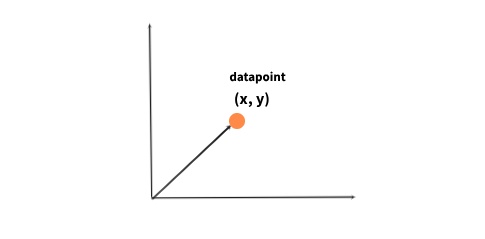

We can consider this point as vector infact, all of the points are vectors.

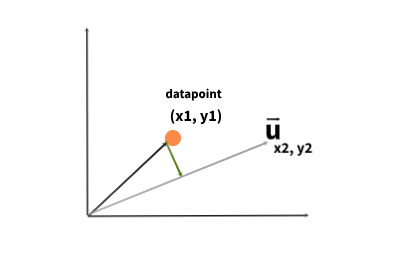

We have to find the unit vector  $(\vec u)$ on which the point $x$ will be projected.

\
Projection is calculated as:

$$projection = \frac {\vec u . \vec x} {|u|} = u^T x$$

* $|u|$ magnitude of u

$[x_1, y_1], [x_2, y_2]$

= $[x_1, y_1] =
\begin{bmatrix}
x_2, \\
y_2
\end {bmatrix} $

=$x_1 x_2 + y_1 y_2$ --> Scalar

* Now we can project this data on any of the unit vector.
* We will choose that unit vector where the variance is maximum.
* To select the vector with maximum variance we will check the variance.

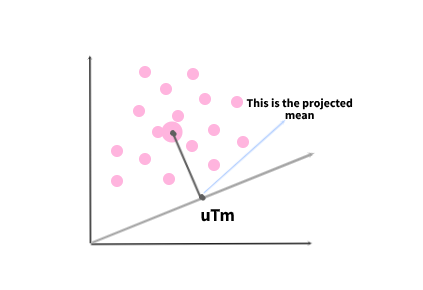


$$variance = \sum_{i = 1}^{n} \frac {(u^T x_i - u^T \bar x)^2}{n}$$

This is the variance for each data points. We need to select a unit vector whose variance we calculated above the is highest when projected all data points on that unit vector.

There can be multiple unit vectors for the data points. To select the best vector becomes an optimization problem.

### **Covariance and Covariance matrix**

Covariance helps in understanding the relationship among the axes. Consider the example below:

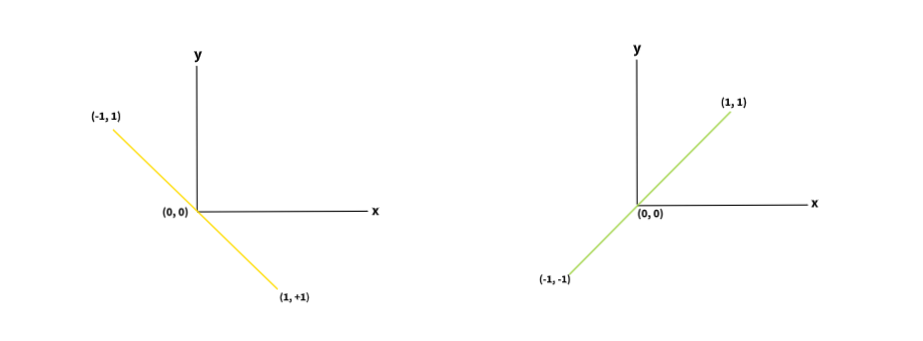

$cov(1) = \frac {(-1 *1) + (0 * 0) + (1 * -1)}{3} = \frac {-2}{3}$

*Negative* covariance means as $x$ increases $y$ decreases.

$cov(2) = \frac {(-1 * -1) + (0 * 0) + (1 * 1)}{3} = \frac {2}{3}$

*Positive* covariance means as $x$ increases $y$ also increases.

$$cov_{matrix} = \begin {bmatrix}
cov(x_1 x_1) & cov(x_1 x_2) \\
cov(x_1 x_2) & cov(x_2 x_2)
\end{bmatrix}$$

$$ = \begin {bmatrix}
var (x_1) & cov(x_1 x_2) \\
cov(x_1 x_2) & var (x_2)
\end{bmatrix}$$

It tells about spread of each axis. Then what is the relationship among coordinates.

\
#### **Linear Transformations, Eigen Vectors and Eigen Values.**

*Matrices:* Matrices are linear transformations which when applied to the vectors or coordinates, they get transformed. They change positions.

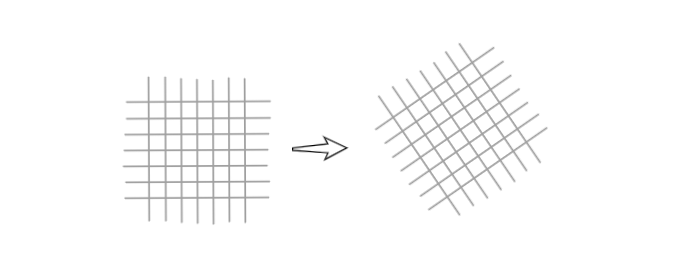


> **Eigen Vectors**

Eigen vectors are special vectors on which when we apply transformations `its direction does not changes`. Though magnitude may increase or decrease negatively or positively.

\
**Eigen Values**

It is value we get after applying transformations. The magnitude of either shrinked or expanded eigen vector value. i.e: How much is the stretching or shrinking factor of the eigen vector.

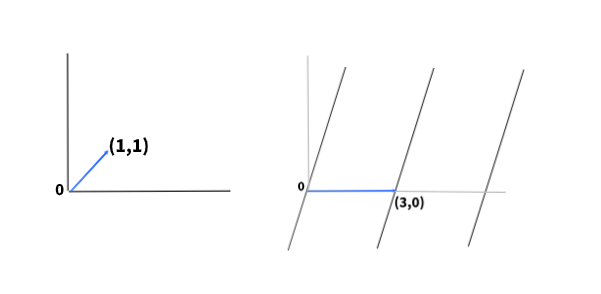

stretching factor is 3. So the eigen value becomes 3.

$$\text {eigen vector} = A (\vec V) = \lambda (\vec V)$$

where,
* $A$ is matrix transformation
* $\vec V$ is an eigen vector
* $\lambda$ eigen value

When we apply the linear transformation on a vector, it is equivalent to multiplying a vector with a scalar.

We find the eigen decomposition of covariance matrix and the eigen vector with largest covariance, i.e. eigen vectors whose eigen value is the largest has the maximum variance. And this is the Principal component.


**Step by Step approach**
1. Mean centre the data or standardize the data.
2. Find the covariance matrix

$ = \begin {bmatrix}
var(f_1) & cov(f_2 f_1) & cov(f_3 f_1)\\
cov(f_1 f_2) & var(f_2) & cov(f_3 f_2)\\
cov(f_1 f_3) & cov(f_2 f_3) & var(f_3)
\end{bmatrix}$

\
3. Find the eigen value/vector
4. Select the principal components $np.cov()$

$PC_1$ will be the component with highest variance.

**How to transform points?**

Suppose we got $PC_1$ like mentioned below.

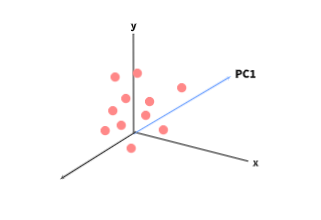

To transform points to $PC_1$ we perform:
 $[u^T x] = np.linalg.eig(cov_{matrix})$

\
> **Finding optimum number of Principal Components**

*Eigen Values:* Eigen values of eigen vectors/ pca components tell how much variance does a particular component alone can expresss for whole data.
So we find the precentage of explained variance/eigen values to get atleast 90% variance.

We take that many values whose percentage together adds up to $90$%.


**When PCA does not work?**

If the variance is equal on each axis. PCA will not work.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = df.append(df1,ignore_index=True)

df = df.sample(40)

<ipython-input-1-459eff829b6b>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1,ignore_index=True)


In [2]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [3]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])


# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [4]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


eigen_values

array([1.3536065 , 0.94557084, 0.77774573])